In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

**1. Here's some data (x,y) for which we would like to consider a similarly-behaving functional model:**

In [2]:
P = np.array([
    [0.02302, 0.41897,   0.686, 0.88858,  1.0912,  1.2385,  1.4595,  1.7357,   2.058,   2.325,  2.6842,  3.0617,  3.4392,   3.872,  4.2864,  4.8297],
    [0.1507, 0.19276, 0.28388, 0.43107, 0.58528, 0.72547,  0.9007,   1.097,  1.2652,  1.3773,  1.5105,  1.6297,  1.6998,  1.7909,    1.84,   1.896]
])

**a) Pull out the x (first row) and y (2nd row)  arrays and plot the data**

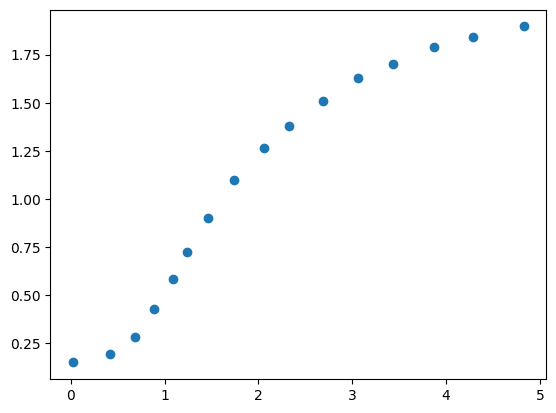

In [3]:
x = P[0, :].reshape(-1, 1)
y = P[1, :].reshape(-1, 1)

plt.scatter(x, y)

**b) Consider the "logistic" model $y=\frac{a}{1+be^{-cx}}$ . What does this curve look like on the real line, as  and  ? If our model were "correct" we should see $\log\left(\frac{a}{y}-1\right)=\alpha+\beta x$ for some value of $a$ . Explain.**

We have that,
$$y = {a \over 1 + be^{-cx}}$$

There are three special cases which should be considered up front. If $y = 0$, then the model is uninteresting and "incorrect". Similarly, if $-cx = 0$, then $c = 0$, and $x$ has no effect on the model. So, then $y$ is a constant, and the model is uninteresting and "incorrect". Finally, if $b = 0$, then $y = a$, again making $y$ constant. So, we will assume from here that $y \ne 0$, $-cx \ne 0$, and $b \ne 0$.

It follows that,
$$(1 + be^{-cx}) = {a \over y}$$
$$be^{-cx} = ay^{-1} - 1$$
$$\ln(b) - cx = ln(ay^{-1} - 1)$$
Then let,
$\alpha = ln(b), \beta = -c$

Then,
$$\alpha + \beta x = ln \big({a \over y} - 1 \big)$$

Note that there are no variables that appear on both sides ($\alpha \ne a$)
We are interested in the shape of the graph of $y$. So, we rearrange the formula as,

$$y = a(e^{\alpha + \beta x} + 1)^{-1}$$

Assuming $c$ (and thus $\beta$) is real-valued, if $b > 0$, then $\alpha$ is real-valued and $e^{\alpha + \beta x}$ will always be positive. This means that the coefficient on  will lie on the open interval $(0, 1)$. For positive  (i.e., negative , as $x \to \infty$, the coefficient will approach 0, and so will $y$, with the direction of approach determined by the sign of $a$. As $x \to -\infty$, the coefficient will approach 1 and $y$ will approach $a$. For negative $\beta$, the reverse will hold.$y$ will be upper bounded by $a$ if $a$ is positive, and lower bounded by $a$ otherwise. 

If $b < 0$ (and thus $\alpha$ is complex), then for positive $\beta$, the absolute value of $e^{\alpha + \beta x}$ will still approach infinity as $x \to \infty$, making $y$ approach zero. 

**c) Try some appropriate values of  and see graphically if the left hand side appears to be a linear function of x.**

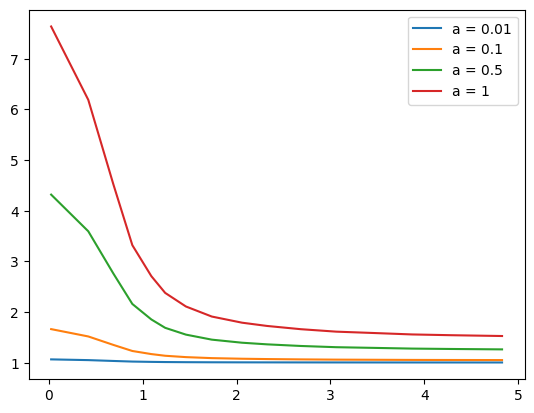

In [4]:
A = [0.01, 0.1, 0.5, 1]
for a in A:
    plt.plot(x, a / y + 1, label=f"a = {a}")
plt.legend()

This does not look particularly linear, except for small $a$. However, when we plot even smaller $a$'s, it becomes clear that the function is not linear.

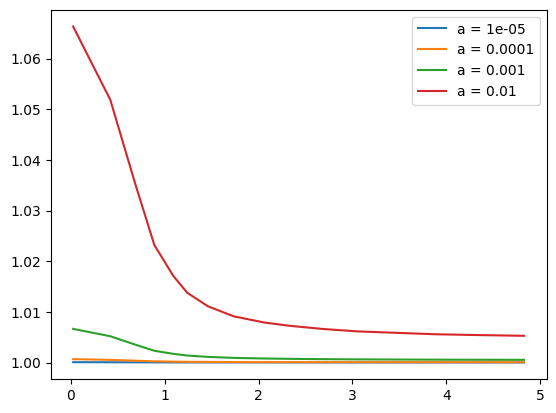

In [5]:
A = [0.00001, 0.0001, 0.001, 0.01]
for a in A:
    plt.plot(x, a / y + 1, label=f"a = {a}")
plt.legend()

**d) Choosing some appropriate starting values of the parameters a,b,c, use lsqnonlin.m to find the least squares approximation of the data with the logistic model. Explain your initial choice of a,b,c. Plot this least squares model in the same graph as in part a).  Are you happy? Why not?**

This doesn't seem like an incredibly difficult job for the optimizer, so I'm just going to start it at [1, 1, 1].

In [6]:
def model(x, params):
    a, b, c, d = params
    return a / (1 + b*np.exp(-c*x))

def resid(params):
    return (model(x, params) - y).reshape(-1)

res = least_squares(resid, [1, 1, 1, 1])
best_params = res.x
res

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-8.070e-03  5.878e-02 ... -3.204e-02 -7.463e-02]
           x: [ 1.831e+00  1.228e+01  1.601e+00  1.000e+00]
        cost: 0.01761142036588286
         jac: [[ 7.789e-02 -1.071e-02  3.028e-03  0.000e+00]
               [ 1.374e-01 -1.767e-02  9.091e-02  0.000e+00]
               ...
               [ 9.873e-01 -1.865e-03  9.821e-02  0.000e+00]
               [ 9.947e-01 -7.932e-04  4.705e-02  0.000e+00]]
        grad: [-1.343e-10  1.744e-08 -1.929e-07  0.000e+00]
  optimality: 1.928770729953816e-07
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 25
        njev: 14

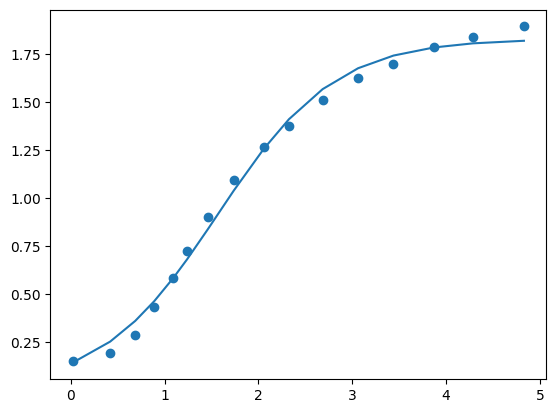

In [7]:
plt.plot(x, model(x, best_params))
plt.scatter(x, y)
plt.show()

The model seems decent. It's underestimating the curvature early on and over estimating it near $x = 3$, but it would be easy to imagine it doing a worse job.

**e) Try the same approach as in part d) with the model $y=\frac{a}{1+be^{-cx}}+d$. Are you happy(er) now? Why?**

In [8]:
def intercept_model(x, params):
    *inner_params, d = params
    return model(x, inner_params) + d

def intercept_resid(params):
    return (intercept_model(x, params) - y).reshape(-1)

res = least_squares(intercept_resid, [1, 1, 1, 1, 1])
best_params_intercept = res.x
res

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-7.261e-02  3.205e-02 ... -1.646e-02 -5.120e-02]
           x: [ 2.040e+00  7.278e+00  1.370e+00  1.233e+01 -1.752e-01]
        cost: 0.013383291717617655
         jac: [[ 1.242e-01 -3.048e-02 ...  0.000e+00  1.000e+00]
               [ 1.961e-01 -4.418e-02 ...  0.000e+00  1.000e+00]
               ...
               [ 9.800e-01 -5.505e-03 ...  0.000e+00  1.000e+00]
               [ 9.904e-01 -2.670e-03 ...  0.000e+00  1.000e+00]]
        grad: [ 6.922e-09 -1.731e-07  2.022e-06  0.000e+00  6.573e-09]
  optimality: 2.0222791414087338e-06
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 23
        njev: 12

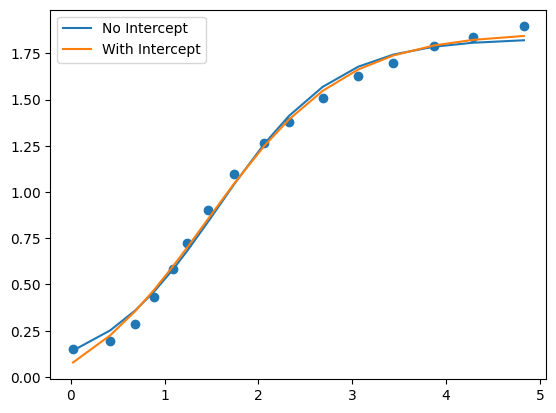

In [9]:
plt.scatter(x, y)
plt.plot(x, model(x, best_params), label="No Intercept")
plt.plot(x, intercept_model(x, best_params_intercept), label="With Intercept")
plt.legend()
plt.show()

Visibly, the model with the intercept might be marginally better. But, it looks like the MSE is approximately half. This is a pretty solid improvement from adding a fifth parameter.

In [10]:
print("MSE w/o intercept", ((model(x, best_params) - y)**2).mean())
print("MSE w/ intercept", ((intercept_model(x, best_params_intercept) - y)**2).mean())

MSE w/o intercept 0.0022014275457353577
MSE w/ intercept 0.0016729114647022069


**2. Here is some (x,y) data**

In [11]:
P = np.array([
    [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5],
    [0.51454, 0.61893, 0.709, 0.7275, 0.77358, 0.72706, 0.71138, 0.69277, 0.62293, 0.68218, 0.6315, 0.58225, 0.59827, 0.51154, 0.52011, 0.49517, 0.48566, 0.46616, 0.42451, 0.4243, 0.40579, 0.40685, 0.4023, 0.38962, 0.33795, 0.3453]
])

**a) Plot the data - we are to fit this data with a function of the form $y=\frac{a+bx}{1+cx+dx^2}$**

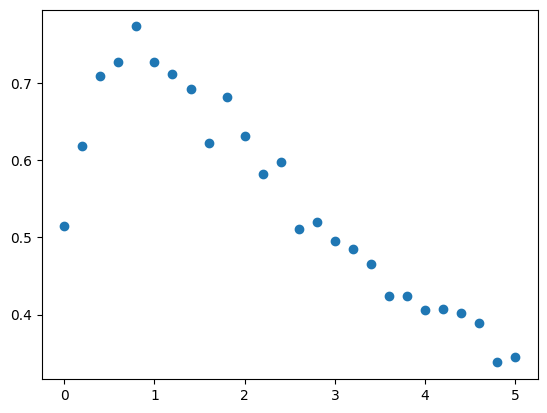

In [12]:
x = P[0, :].reshape(-1, 1) # column vectors
y = P[1, :].reshape(-1, 1)

plt.scatter(x, y)

**b) First use lsqnonlin to estimate the parameters a,b,c,d that best fit the curve in the least squares sense and plot against the data.  Make some educated initial guesses for a,b,c,d.**

I'm gonna guess $a$ is 0.5 because that's roughly the $y$-intercept. Then, $b$ might be about 0.5, because that's what the line looks like early on. I'm not sure $c$ is going to be useful, so I'll say 0. Then, for $d$ say 1 because the graph starts to curve down around 1.

In [13]:
def model(x, params):
    a, b, c, d = params
    return (a + b*x) / (1 + c*x + d*x**2)

def resid(params):
    return (model(x, params) - y).reshape(-1)

res = least_squares(resid, [0.5, 0.5, 0, 1])
best_params = res.x
res

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-4.127e-03  1.188e-02 ...  2.210e-02  3.592e-03]
           x: [ 5.104e-01  1.072e+00  6.442e-01  5.042e-01]
        cost: 0.0045120023740962386
         jac: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
               [ 8.703e-01  1.741e-01 -1.098e-01 -2.196e-02]
               ...
               [ 6.366e-02  3.056e-01 -1.100e-01 -5.281e-01]
               [ 5.943e-02  2.972e-01 -1.037e-01 -5.184e-01]]
        grad: [ 2.272e-10 -5.229e-11  2.579e-09  1.073e-09]
  optimality: 2.579289882370661e-09
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
        nfev: 7
        njev: 7

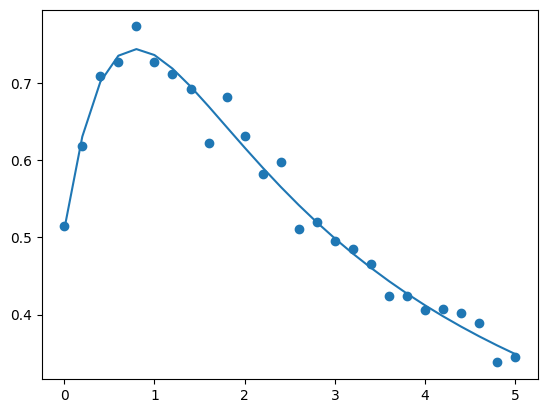

In [14]:
plt.scatter(x, y)
plt.plot(x, model(x, best_params))
plt.show()

**c). if we multiply by the denominator we can rewrite the approximation in the form $y\approx a+bx+c(-xy)+d(-yx^2)$**

 **Optimal values of a,b,c,d can be found using linear least squares and the normal equations. Do that and compare a,b,c,d with the values obtained in part b). Also plot the approximation**

In [15]:
A = np.hstack([
    np.ones_like(x),
    x,
    -x*y,
    -y*x**2
])

A

array([[ 1.       ,  0.       , -0.       , -0.       ],
       [ 1.       ,  0.2      , -0.123786 , -0.0247572],
       [ 1.       ,  0.4      , -0.2836   , -0.11344  ],
       [ 1.       ,  0.6      , -0.4365   , -0.2619   ],
       [ 1.       ,  0.8      , -0.618864 , -0.4950912],
       [ 1.       ,  1.       , -0.72706  , -0.72706  ],
       [ 1.       ,  1.2      , -0.853656 , -1.0243872],
       [ 1.       ,  1.4      , -0.969878 , -1.3578292],
       [ 1.       ,  1.6      , -0.996688 , -1.5947008],
       [ 1.       ,  1.8      , -1.227924 , -2.2102632],
       [ 1.       ,  2.       , -1.263    , -2.526    ],
       [ 1.       ,  2.2      , -1.28095  , -2.81809  ],
       [ 1.       ,  2.4      , -1.435848 , -3.4460352],
       [ 1.       ,  2.6      , -1.330004 , -3.4580104],
       [ 1.       ,  2.8      , -1.456308 , -4.0776624],
       [ 1.       ,  3.       , -1.48551  , -4.45653  ],
       [ 1.       ,  3.2      , -1.554112 , -4.9731584],
       [ 1.       ,  3.4      ,

In [16]:
coefs_normal = np.linalg.solve(A.T @ A, A.T @ y)
coefs_normal

array([[ 0.63619863],
       [-0.02041795],
       [-0.13894197],
       [ 0.05496947]])

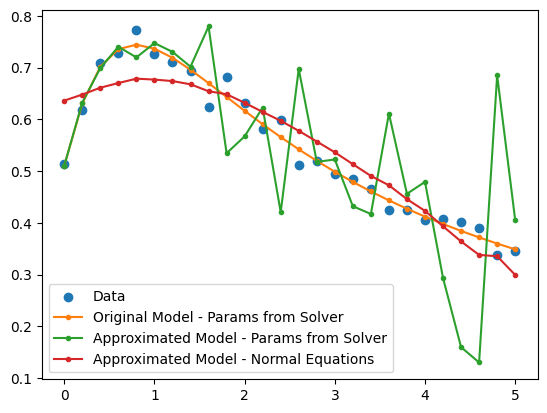

In [17]:
plt.scatter(x, y, color="C0", label="Data")
plt.plot(
    x,
    model(x, best_params),
    marker=".",
    label="Original Model - Params from Solver",
    color="C1"
)
plt.plot(
    x,
    A @ np.array(best_params).reshape(-1, 1),
    marker=".",
    label="Approximated Model - Params from Solver", color="C2")
plt.plot(
    x,
    A @ coefs_normal,
    marker=".",
    label="Approximated Model - Normal Equations",
    color="C3"
)
plt.legend()
plt.show()

In [18]:
# comparison of mse

print(
    "Original Model - Params from Solver",
    ((model(x, best_params) - y)**2).mean()
)
print(
    "Approximated Model - Params from Solver",
    ((A @ np.array(best_params).reshape(-1, 1) - y)**2).mean()
)
print(
    "Approximated Model - Normal Equations",
    ((A @ coefs_normal - y)**2).mean()
)

Original Model - Params from Solver 0.00034707710569971065
Approximated Model - Params from Solver 0.0166397756843523
Approximated Model - Normal Equations 0.0021631246467942403


So, the best model is clearly the original with the params from the solver. Then, when we use those parameters in the approximated model, it goes crazy and gets the worst MSE. The normal equations applied to the approximated model yield a reasonable result that seems to underfit the data.

To think about why this might be happening, let's look at the original and approximated model again.

Original Model:
$$y=\frac{a+bx}{1+cx+dx^2}$$

Approximated Model:
$$y\approx a+bx+c(-xy)+d(-yx^2)$$


If either of these equations held, they would be equivalent. But neither does. They are overdetermined systems. What's actually happening looks like this:

$$y=\frac{a+bx}{1+cx+dx^2} + \epsilon$$

The solver is minimizing the sum of squared $\epsilon$.

Let's try translating into the approximate form and see what happens,

$$y - \epsilon=\frac{a+bx}{1+cx+dx^2}$$
$$(y - \epsilon)(1+cx+dx^2)=a + bx$$
$$y - \epsilon=a + bx + c(-x(y - \epsilon)) + d(-x^2(y - \epsilon))$$
$$y - \epsilon=a + bx + c(-xy) + cx\epsilon + d(-x^2y) + dx^2\epsilon$$
$$y=a + bx + c(-xy) + d(-x^2y) + (cx + dx^2 + 1)\epsilon$$

Recall, these parameters, which have been found by the solver. So, when we plug them into the appoximate model equations, we get a much larger error.

$$\epsilon + (cx + dx^2)\epsilon = y - (a + bx + c(-xy) + d(-x^2y))$$

The difference between predicted and true $y$ nwo has the addition of a term that grows quadratically in $x$.

The following plot shows absolute values of residuals from the approximate model using the params from the solver. Just visually, you can see that they seem to grow very quickly in $x$. But, if we divide by the extra multiplier ($1 + cx + dx^2$), they go back to being well-behaved, normal residuals.

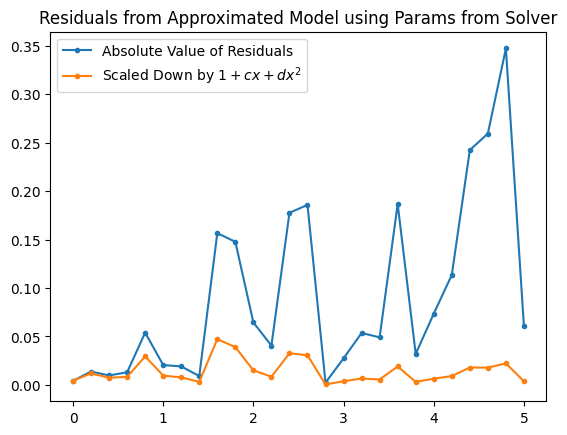

In [19]:
multiplier = best_params[2]*x + best_params[3]*x**2 + 1
abs_residuals = np.abs((A @ np.array(best_params).reshape(-1, 1)) - y)

plt.plot(x, abs_residuals, marker=".", label="Absolute Value of Residuals")
plt.plot(x, abs_residuals/(multiplier), marker=".", label="Scaled Down by $1 + cx + dx^2$")
plt.title("Residuals from Approximated Model using Params from Solver")
plt.legend()

So, that explains what's happening with the first weird model. Now, we need to explain what's happening with the normal equations solution to the approximate equation, which seems to be underfitting. Because of this difference in the error function, this model is simply very different, and it happens to fit the model less well.

The main thing we can see is that it has made very different choices of parameters, but I don't have a good mechanism-level explanation for this.

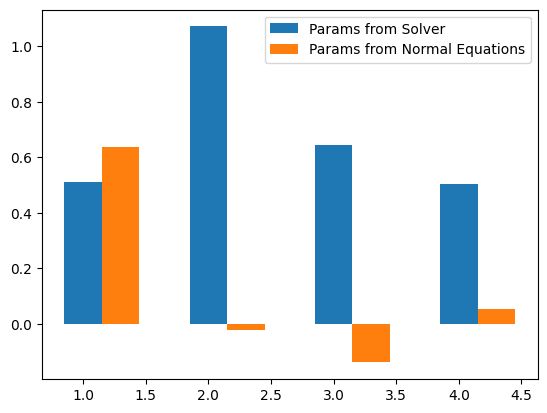

In [20]:
one_to_four = np.arange(1, 5)
plt.bar(one_to_four, best_params, label="Params from Solver", width=0.3)
plt.bar(one_to_four + 0.3, coefs_normal.reshape(-1), label="Params from Normal Equations", width=0.3)
plt.legend()

The solver, using 

**3)  Consider the difference equation**
$x_{n+1}=x_n-.2x_{n-1}-.5x_{n-2}$

**a) Use Matlab to calculate the roots of the characteristic polynomial and then write the general solution in terms of real-valued functions**

Suppose $x_n = r^n$

Then,

$r^{n + 1} = r^n - 0.2r^{n - 1} - 0.5r^{n - 2}$

Then for $r \ne 0$,

$r^3 = r^2 - 0.2 r - 0.5$

$r^3 - r^2 + 0.2r + 0.5 = 0$

In [21]:
poly = np.array([1, -1, 0.2, 0.5])
roots = np.roots(poly)

# remove complex conjugates
roots = roots[np.imag(roots) >= 0]
roots

array([ 0.75630772+0.63512886j, -0.51261545+0.j        ])

In [22]:
# convert roots to polar
theta = np.angle(roots)
mod = np.abs(roots)

print(theta)
print()
print(mod)

[0.69852831 3.14159265]

[0.98761837 0.51261545]


So, the general solution is going to be,
$r^n = c_1 0.5126^n \cos(\pi n) + c_2 0.9876^n \cos(0.6985n) + c_3 0.9876^n \sin(0.6985n)$

**b) Find the specific solution from part a) that satisfies the initial conditions $x_0=1,x_1=-1,x_2=2$ and then plot the solution for $n=0,1,..,50$. (you'll need Matlab to calculate the coefficients in the general solution)**

In [23]:
def basis(n):
    cos_terms = mod**n * np.cos(n * theta)
    sin_terms = mod**n *np.sin(n * theta)
    return np.hstack([cos_terms, sin_terms])

n = np.array([0, 1, 2]).reshape(-1, 1)
x_n = np.array([1, -1, 2]).reshape(-1, 1)

A = basis(n)
np.round(A, 4)

array([[ 1.    ,  1.    ,  0.    ,  0.    ],
       [ 0.7563, -0.5126,  0.6351,  0.    ],
       [ 0.1686,  0.2628,  0.9607, -0.    ]])

In [24]:
c = np.linalg.lstsq(A, x_n, rcond=None)[0]
c

array([[-1.22889676e+00],
       [ 2.22889676e+00],
       [ 1.68783231e+00],
       [-3.73576797e-16]])

It makes sense that the last term would be zero, because this is the coefficient of $\sin(\pi n)$, which is always zero.

In [25]:
A @ c

array([[ 1.],
       [-1.],
       [ 2.]])

So, we successfully solved for the first three values.

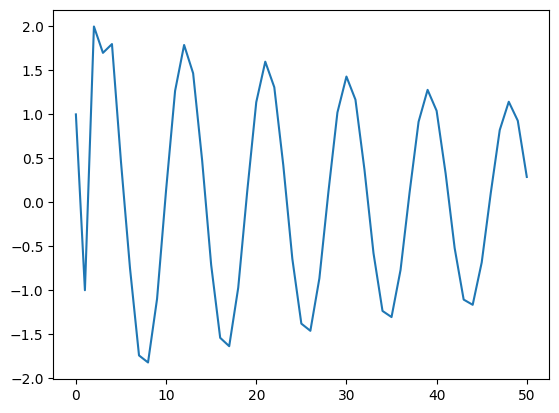

In [26]:
n_50 = np.arange(0, 51).reshape(-1, 1)
plt.plot(basis(n_50) @ c)

**c) Run the difference equation directly for the initial conditions in part b), for n=0,1,..,50  and plot it on top of your plot in part b. They should be numerically identical.**

In [27]:
# iterative solution
def r_n(r_1, r_2, r_3, n):
    r = [r_1, r_2, r_3]
    for i in range(3, n):
        r.append(r[i-1] - 0.2 * r[i-2] - 0.5 * r[i-3])
    return r

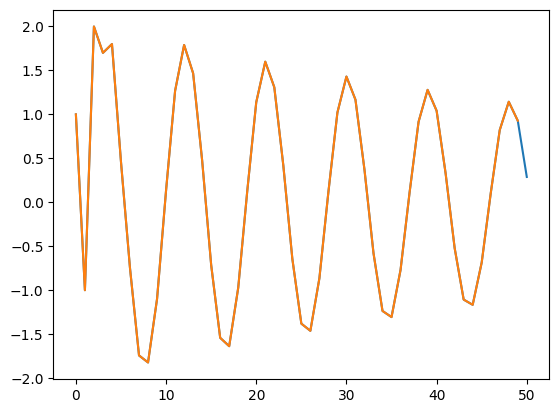

In [28]:
plt.plot(basis(n_50) @ c)
plt.plot(r_n(1, -1, 2, n=50))

They are right on top of each other. We can replot with a diff to confirm.

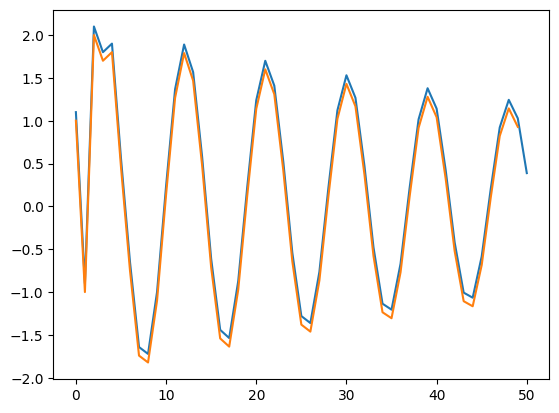

In [29]:
plt.plot(basis(n_50) @ c + 0.1)
plt.plot(r_n(1, -1, 2, n=50))

# Foo

$r^{n + 1} = r^n - 0.2r^{n - 1} - 0.5r^{n - 2}$

$r^{n + 1} - r^n + 0.2r^{n - 1} + 0.5r^{n - 2} = 0$

In [117]:
n = np.array([0, 1, 2]).reshape(-1, 1)
x_n = np.array([1, -1, 2]).reshape(-1, 1)

In [61]:
def iterative(start, n):
    arr = start.copy()
    for i in range(n - len(start)):
        arr.append(arr[-1] - 0.2*arr[-2] - 0.5*arr[-3])
    return arr

In [103]:
poly = np.array([1, -1, 0.2, 0.5])
roots = np.roots(poly)
unique_roots = roots[np.imag(roots) >= 0]

In [166]:
def imag_basis(n):
    n = np.arange(n).reshape(-1, 1)
    return unique_roots.reshape(1, -1)**n

def basis_from_imag(n):
    return np.hstack([
        np.imag(imag_basis(n)),
        np.real(imag_basis(n))
    ])

def remove_zero_cols(m):
    nonzero_cols = ~np.all(m == 0, axis=0)
    return m[:, nonzero_cols]

def get_basis_exp(n):
    return remove_zero_cols(basis_from_imag(n))

m3 = get_basis_exp(3)
c = np.linalg.lstsq(m3, x_n)[0]

m3

array([[ 0.        ,  1.        ,  1.        ],
       [ 0.63512886,  0.75630772, -0.51261545],
       [ 0.96070572,  0.1686127 ,  0.26277459]])

In [170]:
theta = np.angle(unique_roots).reshape(1, -1)
mod = np.abs(unique_roots).reshape(1, -1)

def get_basis_sc(max_n):
    n = np.arange(max_n).reshape(-1, 1)
    return np.hstack([
        np.cos(n * theta) * (mod**n),
        np.sin(n * theta) * (mod**n)
    ])

np.round(get_basis_sc(3), 2)

array([[ 1.  ,  1.  ,  0.  ,  0.  ],
       [ 0.76, -0.51,  0.64,  0.  ],
       [ 0.17,  0.26,  0.96, -0.  ]])

In [ ]:
np.exp()

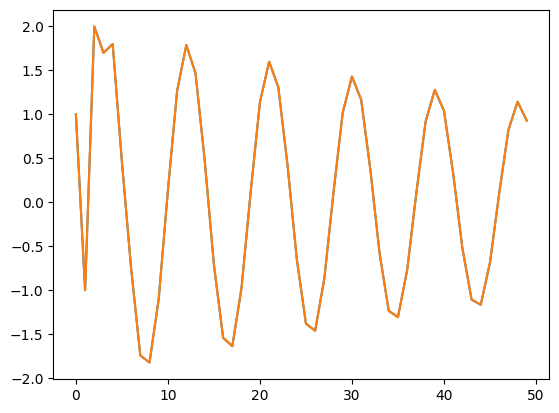

In [156]:
m50 = get_basis_exp(50)
a50 = m50@c
plt.plot(a50)
plt.plot(iterative(x_n.flatten().tolist(), 50))

In [80]:
theta = np.angle(unique_roots[0]).reshape(1, -1)
mod = np.abs(unique_roots[0]).reshape(1, -1)

print(theta)
print(mod)

[[0.69852831]]
[[0.98761837]]


In [83]:
# 
np.cos(np.pi * theta * n) * mod**n

array([[ 1.        ],
       [-0.57680719],
       [-0.30997698]])

In [85]:


def get_basis(max_n):
    n = np.arange(0, max_n).reshape(-1, 1)
    return np.hstack([
        np.cos(np.pi * theta * n) * mod**n,
        np.sin(np.pi * theta * n) * mod**n,
        unique_roots[1]**n
    ])

c = np.linalg.lstsq(get_basis(3), x_n)[0]
get_basis(3)@c

array([[ 1.+0.j],
       [-1.+0.j],
       [ 2.+0.j]])

In [98]:
print(get_basis(4))
p = np.array(list(reversed(poly))).reshape(1, -1)
print(p)
p@get_basis(4)


[[ 1.        +0.j  0.        +0.j  1.        +0.j]
 [-0.57680719+0.j  0.80167544+0.j -0.51261545+0.j]
 [-0.30997698+0.j -0.92482431+0.j  0.26277459-0.j]
 [ 0.92020588+0.j  0.28494438+0.j -0.13470232+0.j]]
[[ 0.5  0.2 -1.   1. ]]


array([[ 1.61482142e+00+0.j,  1.37010378e+00+0.j, -5.55111512e-17+0.j]])

In [86]:
analytical_solution = (get_basis(50)@c).reshape(-1)
iterative_solution = iterative(x_n.reshape(-1).tolist(), 50)

/Users/leoware/Documents/school/math563/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/leoware/Documents/school/math563/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


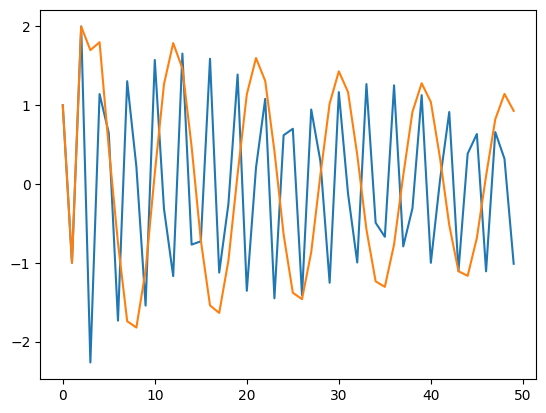

In [87]:
plt.plot(analytical_solution, label="analytical")
plt.plot(iterative_solution, label="iterative")